### [Official seaborn tutorial](https://seaborn.pydata.org/tutorial.html)

#### [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)

# Visualizing statistical relationships
## - Relating variables with scatter plots
## - Emphasizing continuity with line plots
## - Showing multiple relationships with facets

- understanding how variables in a dataset relate to each other.
- understanding how those relationships depend on other variables.
- helpinp to see trends and patterns that indicate a relationship.

The one we will use most is [relplot()](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:

[scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) (with kind="scatter"; the default)

[lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) (with kind="line")

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Relating variables with scatter plots

The scatter plot is a mainstay of statistical visualization. <span style="color:red">It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset</span>. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

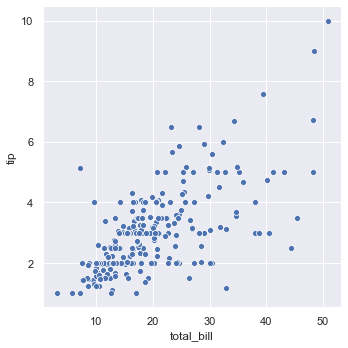

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)
# sns.relplot("total_bill", "tip", data=tips, kind="scatter")
# sns.scatterplot("total_bill", "tip", data=tips)
# sns.lmplot("total_bill", "tip", data=tips, fit_reg=False)

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

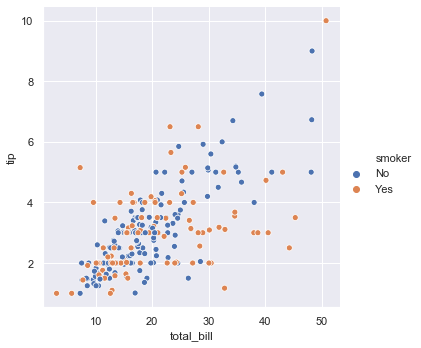

In [3]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
# sns.relplot("total_bill", "tip", data=tips, hue="smoker", kind="scatter")
# sns.scatterplot("total_bill", "tip", data=tips, hue="smoker")

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

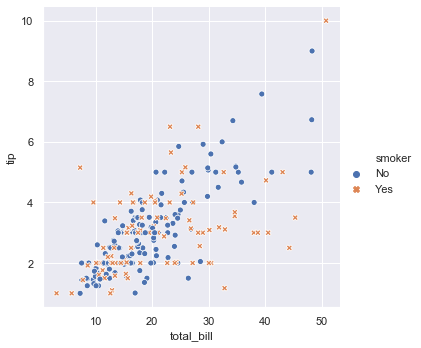

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

In the examples above, the hue semantic was categorical, so the default [qualitative palette](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial) was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette

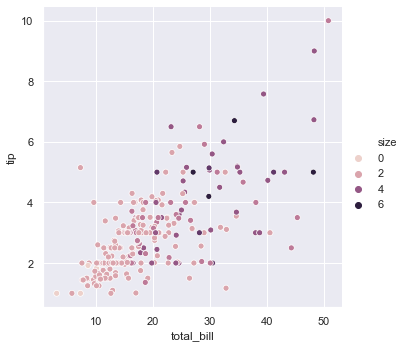

In [5]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to [cubehelix_palette()](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette):

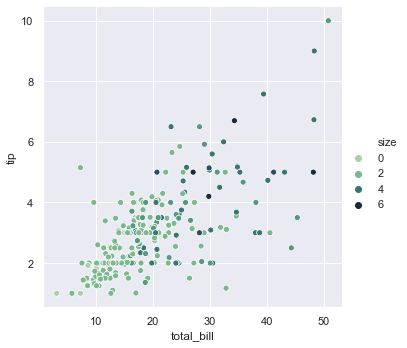

In [6]:
# change the color of dots
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

The third kind of semantic variable changes the size of each point:

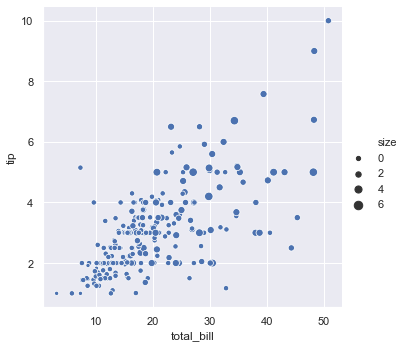

In [7]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)
# using size instead of hue

Unlike with [matplotlib.pyplot.scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter), the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:

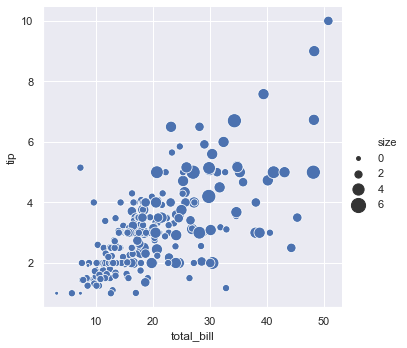

In [8]:
# control the size
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

We can use color and hue in same time.

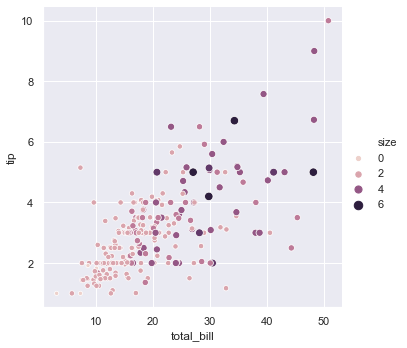

In [9]:

sns.relplot(x="total_bill", y="tip", size="size", hue = 'size', data=tips);

Other examples

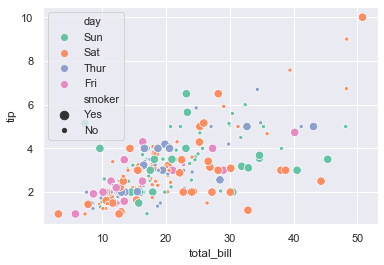

In [10]:
sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="total_bill", y="tip",
                     hue="day", size="smoker",
                     palette="Set2",
                     data=tips)

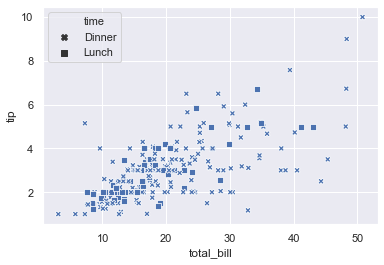

In [11]:
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(x="total_bill", y="tip", style="time",
                     markers=markers,
                     data=tips)

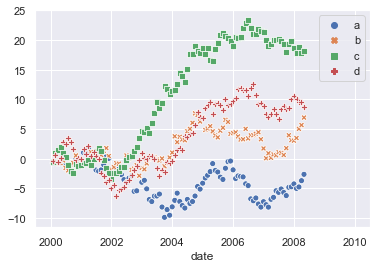

In [12]:
index = pd.date_range("1 1 2000", periods=100,
                      freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
ax = sns.scatterplot(data=wide_df)

-------------------------

## Emphasizing continuity with line plots

With some datasets, you may want <span style="color:red">to understand changes in one variable as a function of time, or a similarly continuous variable</span>. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the [lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) function, either directly or with [relplot()](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) by setting kind="line":

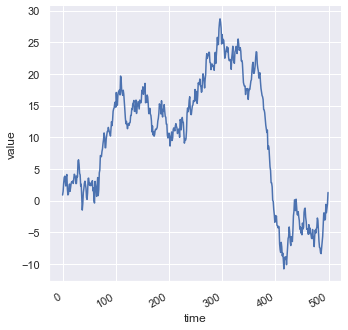

In [13]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

# autofmt_xdate(self, witch):Date ticklabels often overlap, so it is useful to rotate them and right align them
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html
# which : {None, 'major', 'minor', 'both'}

#### Aggregation and representing uncertainty¶
More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

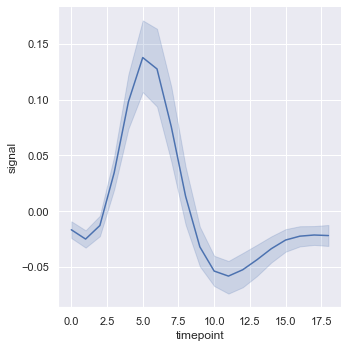

In [14]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
# x value has multuple y values

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

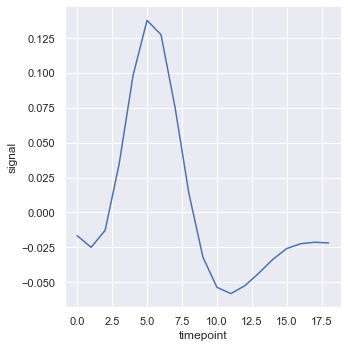

In [15]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

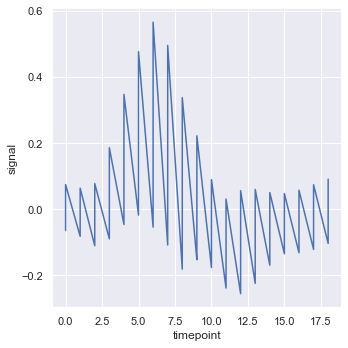

In [16]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)
# estimator: name of pandas method or callable or None, optional (mean, sum, max, min...)
# Method for aggregating across multiple observations of the y variable at the same x level.
# If None, all observations will be drawn.

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

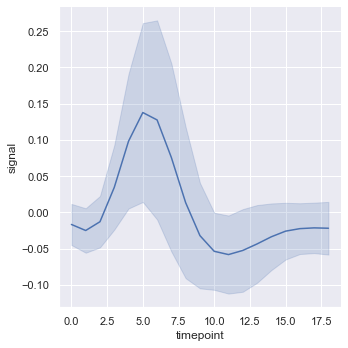

In [17]:
sns.relplot(x="timepoint", y="signal", kind="line", ci='sd', data=fmri)
# ci: int or “sd” or None, optional (larger int has larger range)
# Size of the confidence interval to draw when aggregating with an estimator.
# “sd” means to draw the standard deviation of the data. Setting to None will skip bootstrapping.

#### Plotting subsets of data with semantic mappings

The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the <span style="color:red">hue, size, and style</span> of the plot elements.\
Using semantics in lineplot() will also determine how the data get aggregated.

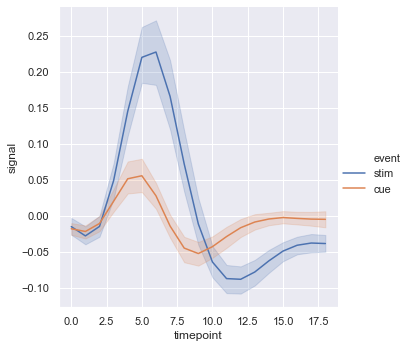

In [18]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)
#sns.lineplot("timepoint", 'signal', data = fmri, hue = 'event')

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

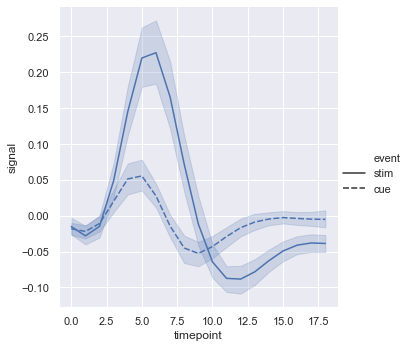

In [19]:
sns.relplot(x="timepoint", y="signal", style="event",
            kind="line", data=fmri);

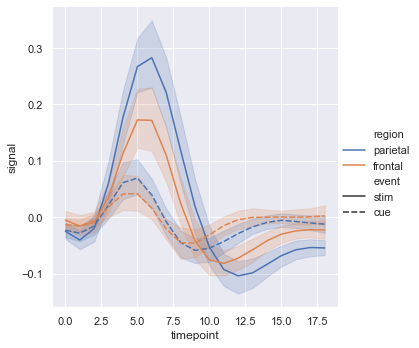

In [20]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

You can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

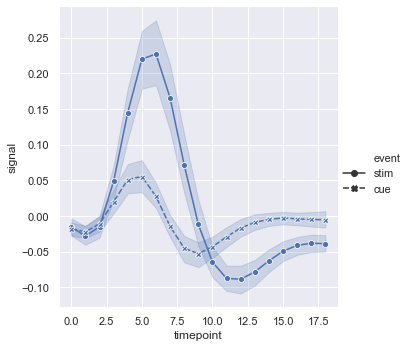

In [21]:
sns.relplot('timepoint', 'signal', data=fmri,
          kind='line', style='event', markers=True)
# + dashes=False

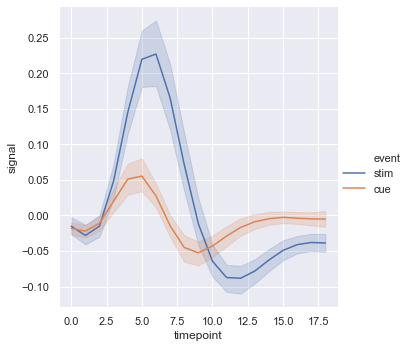

In [22]:
sns.relplot('timepoint', 'signal', data=fmri,
          kind='line', hue='event', markers=True)
# hue isn't affectied by markers

You can use hue and style in one time

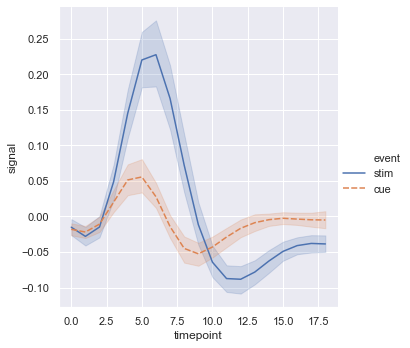

In [23]:
sns.relplot('timepoint', 'signal', data=fmri,
          kind='line', hue='event', style='event')

When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:

'\nIf the x and y observations are nested within sampling\nunits, those can be specified here. This will be taken \ninto account when computing the confidence intervals by \nperforming a multilevel bootstrap that resamples both units and observations.\n'

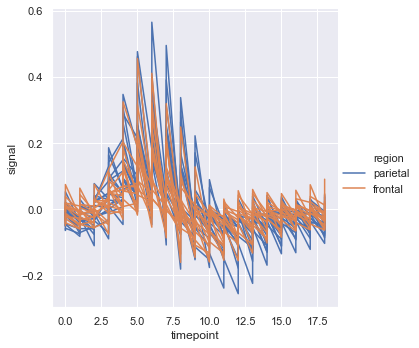

In [24]:
sns.relplot('timepoint', 'signal', hue='region', units='subject',
           estimator=None, kind='line', data=fmri)
# units: variable name in data, optional
"""
If the x and y observations are nested within sampling
units, those can be specified here. This will be taken 
into account when computing the confidence intervals by 
performing a multilevel bootstrap that resamples both units and observations.
"""

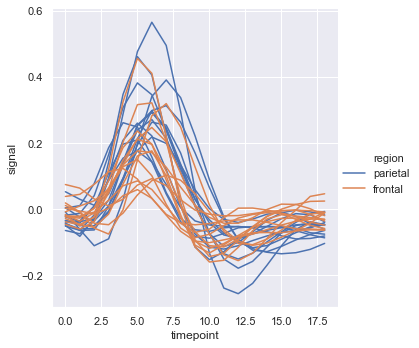

In [25]:
sns.relplot('timepoint', 'signal', hue='region', units='subject',
           estimator=None, kind='line', data=fmri.query("event == 'stim'"))
# df.query(): Query the columns of a DataFrame with a boolean expression.
# df.query(statement(=condition))

The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric:

In [26]:
dots = sns.load_dataset("dots").query("align == 'dots'")

In [27]:
dots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 393
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        394 non-null    object 
 1   choice       394 non-null    object 
 2   time         394 non-null    int64  
 3   coherence    394 non-null    float64
 4   firing_rate  394 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 18.5+ KB


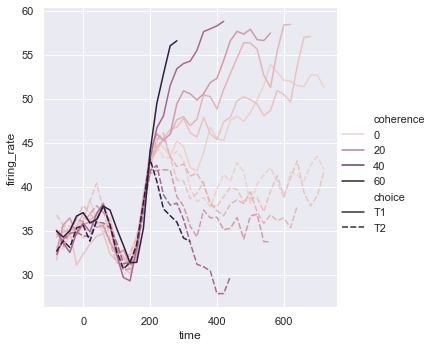

In [28]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots)

You can alter how the colormap is normalized:

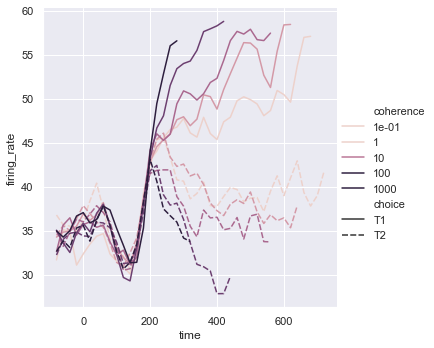

In [29]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots)
# LogNorm(): Normalize a given value to the 0-1 range on a log scale.
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.LogNorm.html

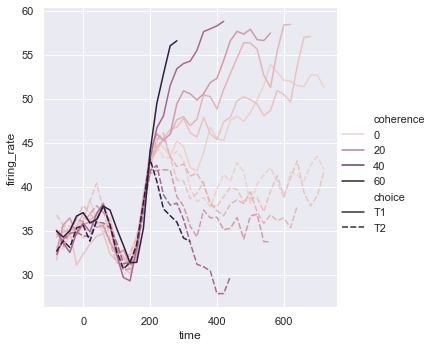

In [30]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots)

The third semantic, size, changes the width of the lines:

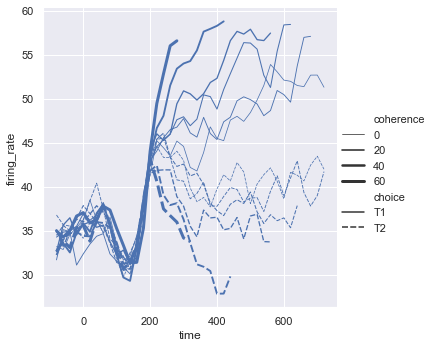

In [31]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots)

While the size variable will typically be numeric, it’s also possible to map a categorical variable with the width of the lines. (it will be difficult to distinguish much more than “thick” vs “thin” lines.)

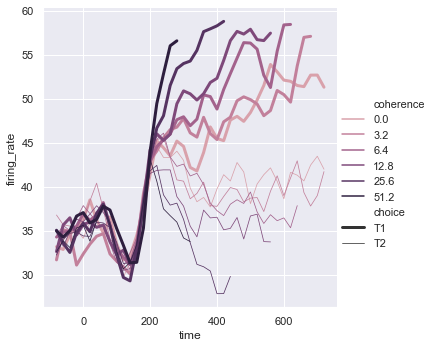

In [32]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

#### Plotting with date data

Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

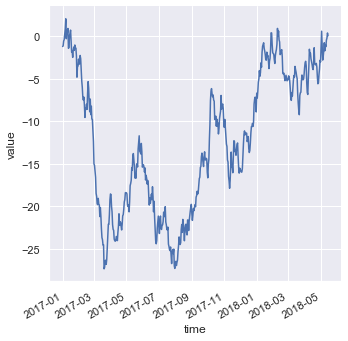

In [33]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

----------------------

## Showing multiple relationships with facets

Understand how a relationship between two variables depends on more than one other variable.

The best approach may be to make more than one plot. Because [relplot()](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) is based on the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid), this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

Using 'col' and 'row'

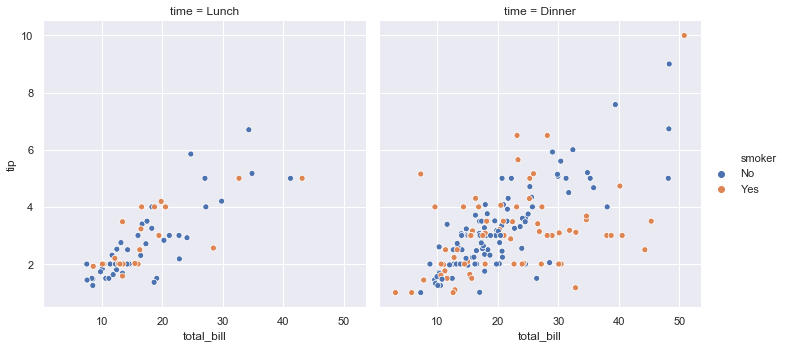

In [34]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);
# sns.dotplot("total_bill", "tip", hue="smoker", col="time", data=tips)

One by faceting on the columns and one by faceting on the rows

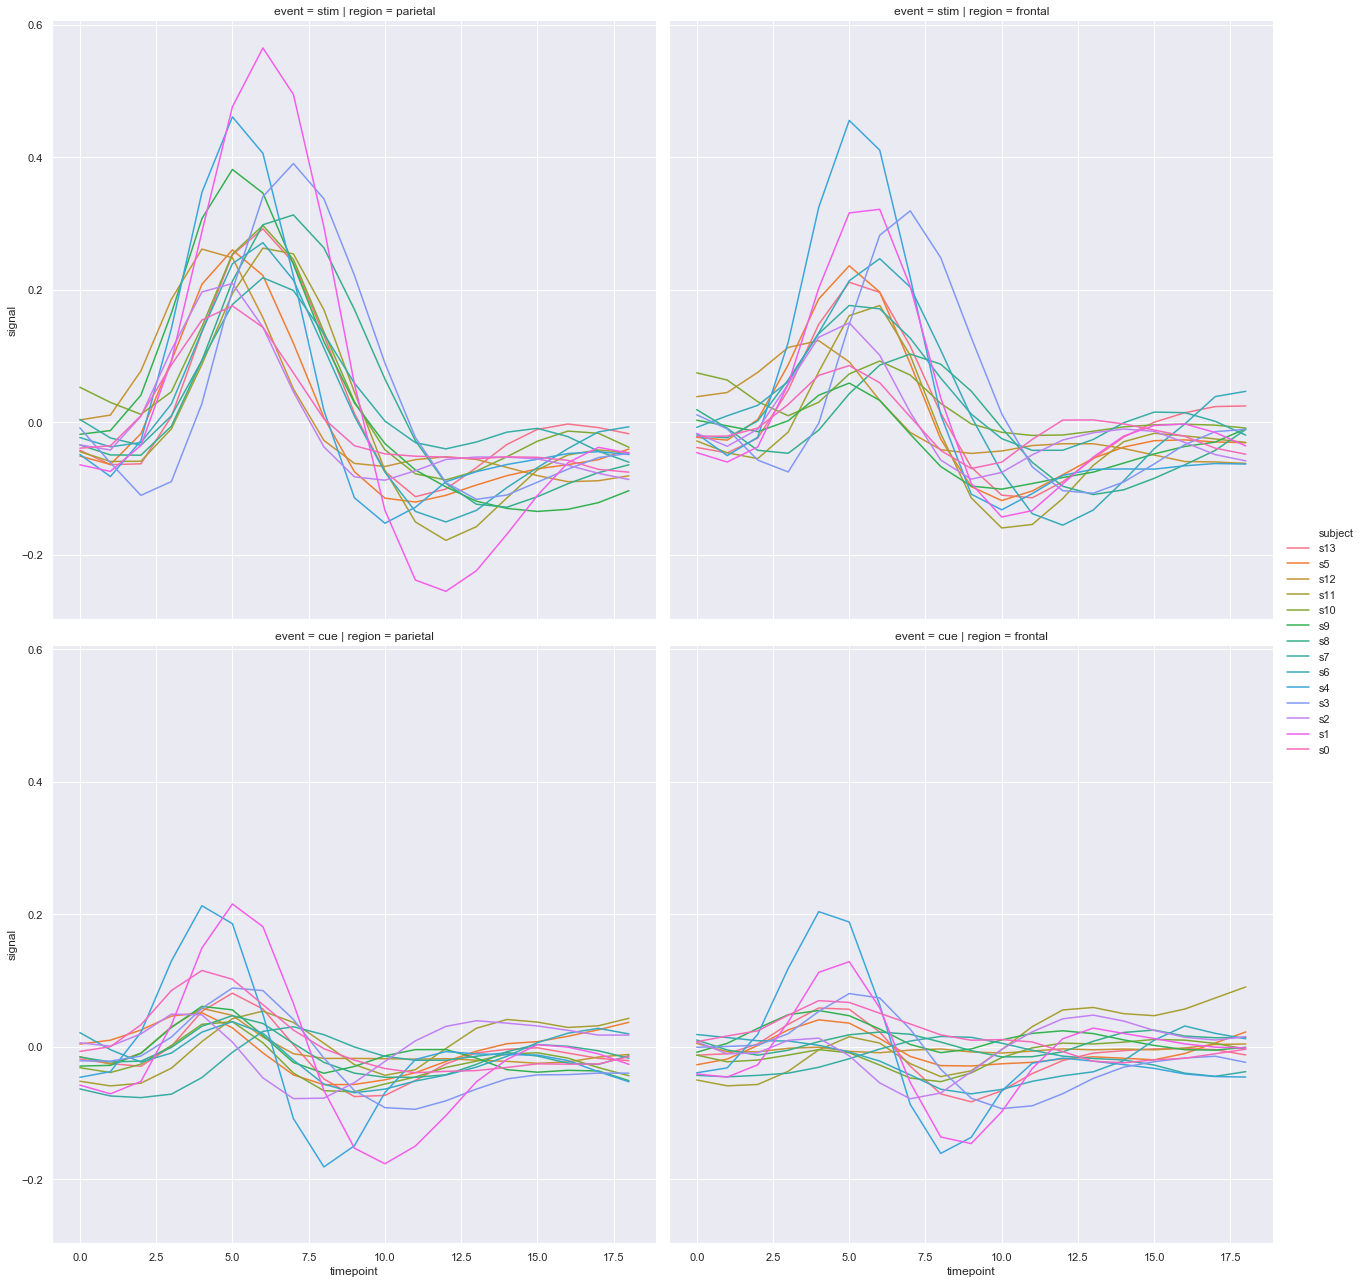

In [35]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=9,
            kind="line", estimator=None, data=fmri);

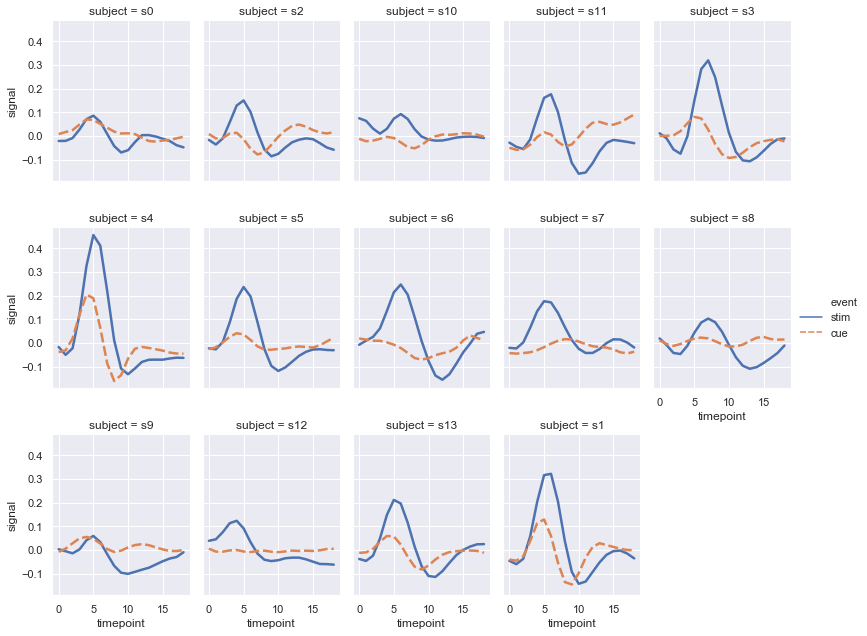

In [36]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));